In [39]:
#from SSIM_PIL import compare_ssim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

import skimage
from skimage.io import imread
import os

iteration=20

In [40]:
def get_Noise(img,d):
    #return skimage.util.random_noise(img, mode='s&p', amount=d)
    paper=d
    salt=1-d
    #row,col=img.size
    row, col=img.shape
    g=np.matrix(img).reshape(row, col)
    #g=arr.reshape(row, col)
    for i in range(row):
        for j in range(col):
            ran=np.random.random()
            if ran<paper:
                g[i,j]=0
            elif ran>salt:
                g[i,j]=255
            else:
                g[i,j]=img[i,j]
    return g

In [41]:
def creatingCsvFile(iteration):    
    i=0
    p=[]
    f = open('MSE(s)ofImages.csv', "a") 
    while i<iteration:
        f.write(str(i)+',')
        i+=1
    #f.write(str(p))
    f.write('\n')
    f.close()


In [42]:
creatingCsvFile(iteration)

In [43]:
def plotting(img,item,iteration):
    #iteration=20
    x=[]
    y=[]
    d=0.0 #this need to be figured out later after the guidance of sir
    while(iteration>0 and d<=1.0):
        #x=[]
        #y=[]
        noise_img=get_Noise(img,d) #getting noisy image
        mse=np.square(np.subtract(img,noise_img)).mean() #calculating MSE of Original image and Image with Noise
        x.append(d)
        y.append(mse)
        #plt.show()  #need to be turned on-------
        #print('x[] : ',x,'\n')
        #print('y[] : ',y)
        d=d+0.05
        f = open('MSE(s)ofImages.csv', "a") 
        f.write(str(mse)+', ')
        f.close()
        iteration=iteration-1
    
    #plt.title('MSE VS Density of Noise of Image : '+item)
    #plt.xlabel("Density")
    #plt.ylabel("MSE")
    #plt.scatter(x, y,color='red')
    #plt.plot(x, y, marker='o')
    #plt.show()
    
    f = open('MSE(s)ofImages.csv', "a") 
    #f.write(str(y))
    f.write('\n')
    f.close()

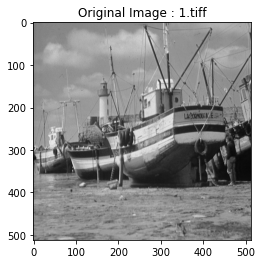

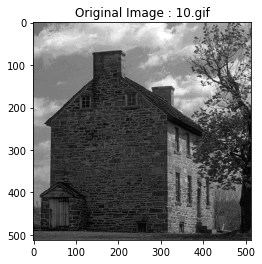

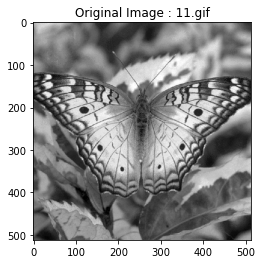

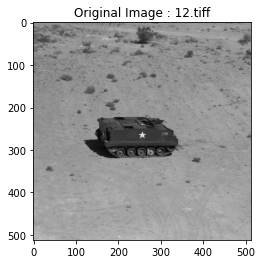

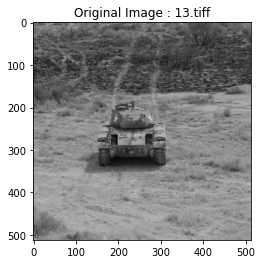

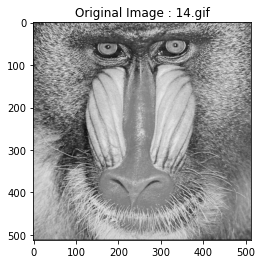

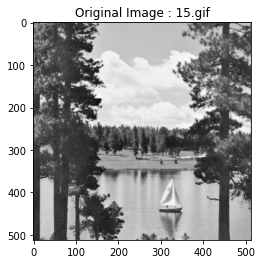

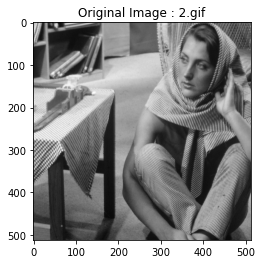

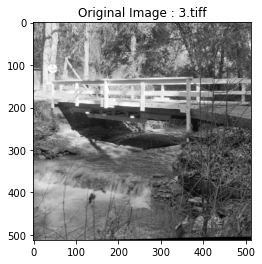

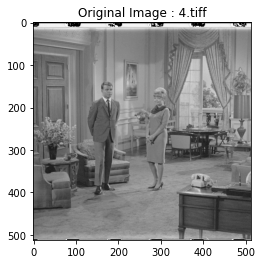

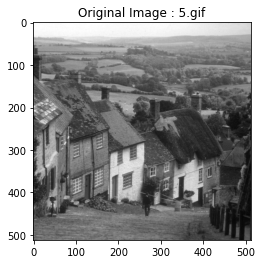

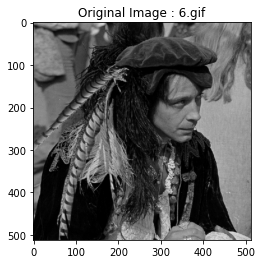

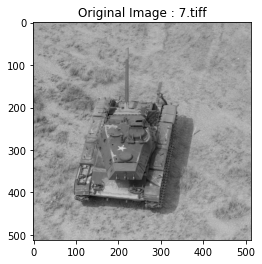

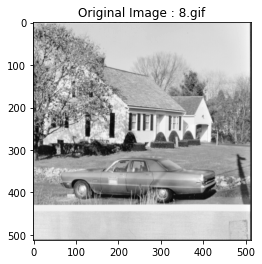

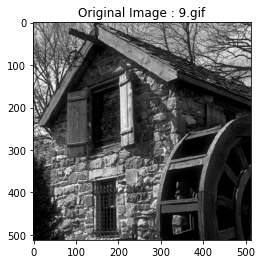

In [44]:
path='C://Users//Biswarup Mistry//Desktop//Misc//'  #defining the image directory
dir_list = os.listdir(path)

#img=imread(r'C:\Users\Biswarup Mistry\Desktop\Misc\1.tiff')

#plt.imshow(g,cmap=plt.cm.gray) 


i=len(dir_list)
for item in dir_list :
    #plt.subplot(1, len(dir_list), len(dir_list)-i+1)
    #if item=='1.tiff':
    k=str(path+str(item))
    img = imread(k)
    plt.title('Original Image : '+item)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.show()
    #plotting(img,item)
        
    i=i-1
#plt.show()

In [45]:
for item in dir_list :
    k=str(path+str(item))
    img = imread(k)
    plotting(img,item,iteration)


In [46]:
#d=0.05
#img=
#x=[]
#y=[]
#noise_img=get_Noise(img,d) #getting noisy image
#mse=np.square(np.subtract(img,noise_img)).mean() #calculating MSE of Original image and Image with Noise
#x.append(d)
#y.append(mse)
#plt.title('MSE VS Density of Noise of Image : '+item)
#plt.xlabel("Density")
#plt.ylabel("MSE")
#plt.scatter(x, y,color='red')
#plt.plot(x, y, marker='o')
#plt.show()  #need to be turned on-------
#print('x[] : ',x,'\n')
#print('y[] : ',y)

In [47]:
data=pd.read_csv(r"C:\Users\Biswarup Mistry\Desktop\The_Files\CODING\Python-Programming\MSE(s)ofImages.csv")
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Unnamed: 20
0,0.0,10.837345,21.456581,32.312424,42.959427,53.844563,64.693447,75.413300,86.085976,96.927284,...,107.712650,107.647614,107.701283,107.785538,108.008480,108.056580,107.999802,108.112926,108.193398,
1,0.0,9.739941,19.743828,29.592724,39.456997,49.336594,59.087891,69.236179,79.085094,88.875107,...,98.210163,98.107517,97.994934,97.893082,97.486259,97.422337,97.353134,97.103092,96.860641,
2,0.0,10.149837,20.195885,30.482323,40.431709,50.330009,60.702374,70.621105,80.835136,90.872684,...,100.915592,100.810104,100.405365,100.052151,99.993717,99.487148,99.426762,98.990288,98.833908,
3,0.0,7.622894,15.409863,22.704941,30.517044,38.047981,45.794090,53.495224,60.914570,68.516479,...,76.668583,77.099682,77.528366,78.015663,78.397427,78.869705,79.313156,79.809231,80.270672,
4,0.0,10.556545,21.092369,31.632565,42.386673,52.943562,63.566387,73.982159,84.463684,95.108543,...,105.431255,105.083477,105.064964,104.834602,104.613594,104.460499,104.353687,104.016693,103.848434,
5,0.0,10.225891,20.544559,30.948929,41.076797,51.615704,61.551250,71.920574,82.218700,92.581161,...,102.920681,102.944244,103.033947,102.853199,102.744560,102.904984,102.755142,102.821548,102.865982,
6,0.0,11.339329,22.895702,34.578411,45.876148,57.027542,68.906113,80.223568,91.844635,102.955719,...,114.659695,114.633167,114.635143,114.876186,114.616856,114.838608,114.885284,114.759697,114.813759,
7,0.0,10.860340,21.839161,32.497547,43.771324,54.678394,65.345966,75.883301,87.136864,98.038052,...,108.728970,108.811928,108.846684,108.899914,108.937153,109.063366,109.163242,109.176331,109.005478,
8,0.0,11.801071,23.500923,35.145241,47.079475,58.441071,70.459488,82.102283,93.637238,105.583191,...,117.655411,118.017311,118.408829,118.977581,119.339622,119.567574,120.195431,120.587795,121.009041,
9,0.0,9.649460,19.231140,29.002407,38.541565,48.334190,57.831841,67.454002,77.014732,86.635704,...,96.335960,96.538685,96.330688,96.433140,96.499748,96.445972,96.528759,96.634377,96.662170,


In [48]:

df=pd.DataFrame(data)
def combined(dir_list,iteration):
    k=0
    x=[]
    d=0.0
    #iteration=20
    while iteration>0:
        x.append(d)
        d=d+0.05 
        iteration=iteration-1

    plt.title('MSE(s) vs Density')
    plt.xlabel('density')
    plt.ylabel('MSE(s)') 
    #df=pd.DataFrame(data)
    while k<len(dir_list):
        u=np.array([])
        u=np.append(u,df.iloc[k,])
        u=u[:-1]


        plt.scatter(x,u,marker='o')
        plt.plot(x,u)
        k+=1
    
    #u=np.array([])
    #u=np.append(u,df.iloc[0,])
    #print('u[] : ',u)
    #print('\nlen(u) : ',len(u))
    
    plt.show()

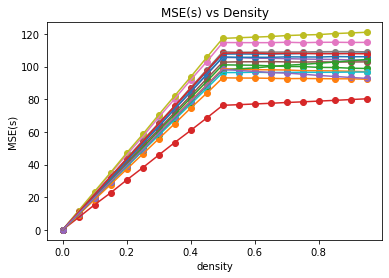

In [49]:
combined(dir_list,iteration)